# PHYS***** - Project 1 - Measuring Drop Spreading Law

James Emberton - ID: ********,
University of Manchester,
February 2025

Import and initialise:

In [1]:
# Initialisation
import string
from math import *
import numpy as np
import matplotlib.pyplot as plt
import random
import scipy.optimize as opt
from matplotlib.animation import FuncAnimation
from IPython import display
from matplotlib.patches import Circle

plt.rcParams.update({'font.size': 14})
plt.style.use('default')


## Introduction

This Notebook will detail the process of analysing three sets of data collected of the radius of a very small droplet of liquid on a hydrophilic surface against time. Knowing the volume of the liquid (which is constant) and the radius, $R$ of the liquid over time allows us to calculate the droplet's height, $H$ as the droplet spreads. It then follows that by simple geometry we can find the contact angle between the droplet and the surface, $\theta$, over time, as we know both the radius and height of the droplet at each time interval. As the radius grows, the height of the droplet falls, leading to a decrease in contact angle over time.

By differentiating the data for radius over time, we may obtain the spreading speed, $U$, of the droplet. We can then find a spreading model which links the evolution of $U$ and $\theta$ as the droplet moves toward equilibrium. We will attempt to fit two different spreading laws to the data, the Cox-Voinov and de Gennes laws, and we will use different statistical techniques including a $\chi^{2}$ test and investigating residuals to determine which of the models is more appropriate for our droplet. It is important to know which spreading law a particular liquid/surface interaction adheres to in scenarios where the interaction may be crucial to a machine acting correctly, such is the case in the experiment our data is derived from, where it is printing ink being investigated.

## Experimental Data

Below is the data given for the experiment.  It consists of a sequence of circle radii ($R$, measured in micrometers), obtained from image processing in three different experimental runs. The corresponding time ($t$, measured in seconds) was obtained from the image timestamps measured from the beginning of the experiment.

In [2]:
# Radius data 
# experiment 1
radius_data1 = np.array([59.513027, 66.368389, 69.506166, 71.700852, 74.735925, 76.007795, 76.695256, 78.039551, 79.598386, 80.075493, 80.079624, 81.495363, 82.598934, 83.172805, 84.919440, 85.155809, 85.718415, 85.920147, 86.000243, 87.120934, 87.507943, 87.786892, 87.060409, 88.086562, 88.113767, 88.436448, 89.082172, 89.139957, 89.210538, 89.356928, 90.312937, 90.406557, 90.754907, 90.88941, 91.096467])
# experiment 2
radius_data2 = np.array([59.810888, 65.360919, 69.088934, 72.594631, 74.694093, 76.440186, 78.133942, 78.618537, 79.753566, 80.745559, 81.422723, 81.634563, 82.861597, 84.335873, 85.362055, 85.537714, 86.159399, 86.873675, 86.918131, 87.003533, 87.126402, 87.155440, 87.224911, 87.394479, 87.433936, 87.626938, 87.701465, 87.834029, 87.963874, 88.153147, 88.209880, 88.542036, 88.86527, 89.082038, 89.214132])
# experiment 3
radius_data3 = np.array([58.200029, 64.826353, 69.332991, 73.504694, 74.295033, 77.506575, 78.413291, 79.952682, 81.339708, 81.938359, 82.528196, 82.807452, 83.378999, 84.521468, 84.507216, 85.064265, 85.247146, 85.900079, 86.475709, 86.776052, 87.158810, 87.343755, 87.448085, 87.822712, 88.140434, 88.311032, 88.619312, 88.970210, 89.373613, 89.754486, 89.900430, 90.116608, 90.288358, 90.711677, 90.989783])
# time
time = np.array([0.500000, 1.000000, 1.500000, 2.000000, 2.500000, 3.000000, 3.500000, 4.000000, 4.500000, 5.000000, 5.500000, 6.000000, 6.500000, 7.000000, 7.500000, 8.000000, 8.500000, 9.000000, 9.500000, 10.000000, 10.500000, 11.000000, 11.500000, 12.000000, 12.500000, 13.000000, 13.500000, 14.000000, 14.500000, 15.000000, 15.500000, 16.000000, 16.500000, 17.000000, 17.500000])

### Calculating the Uncertainty in $R$

First, we want to calculate the uncertainty in $R$. We can do this by finding the standard deviation of the three different data sets, which we will take as a proxy for the true uncertainty in $R$, and we will assume this is true of all variables from this point on.

In [3]:
# creating an array with the average value of R based on the experimental data
radius_avg = np.array([((radius_data1[i] + radius_data2[i] + radius_data3[i]) / 3) for i in range(len(time))])

# creating an array of the standard deviation (which we will use as the uncertainty) of R
radius_std = np.array([np.sqrt((pow(radius_data1[i] - radius_avg[i], 2) + pow(radius_data2[i] - radius_avg[i], 2) \
                                + pow(radius_data3[i] - radius_avg[i], 2)) / 3) for i in range(len(time))])
# upon printing this data, the standard deviation of each value of R at each time is in the range 0.1-1mcm (appropriate)

### Plotting Experimental data

Now we plot the raw data from experiments 1-3 to get a good idea of what our data looks like.

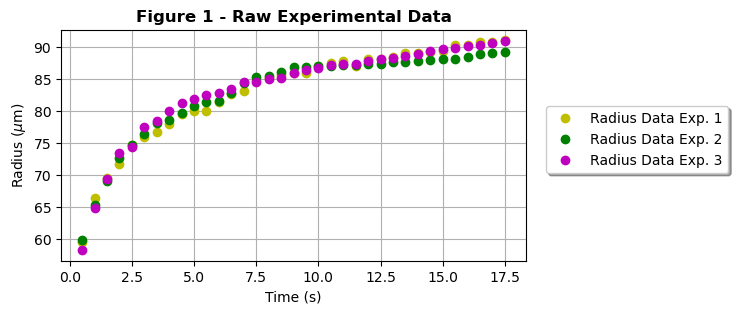

In [4]:
# tweeking the figure size
plt.rcParams["figure.figsize"] = (6,3)
plt.figure()

# plotting data from experimental runs 1-3:
plt.plot(time, radius_data1, "yo", label = "Radius Data Exp. 1")
plt.plot(time, radius_data2, "go", label = 'Radius Data Exp. 2')
plt.plot(time, radius_data3, "mo", label = 'Radius Data Exp. 3')

# setting axis labels & figures
plt.xlabel("Time (s)")
plt.ylabel(r"Radius ($\mu$m)")
plt.title("Figure 1 - Raw Experimental Data", weight = "bold")
plt.legend(bbox_to_anchor = (1.45, 0.7), fancybox = True, shadow = True)
plt.grid()

# displaying the plot
plt.show()

$\textit{Figure 1 - Raw experimental data from the three sets of radius data.}$ 

$\textit{On the y-axis is the radius of the droplet, in mcm, and on the x-axis is time elapsed since the droplet made contact with the surface, in s}$.

Now, let's plot our mean radius data, fit with error bars from our standard deviation calculation above.

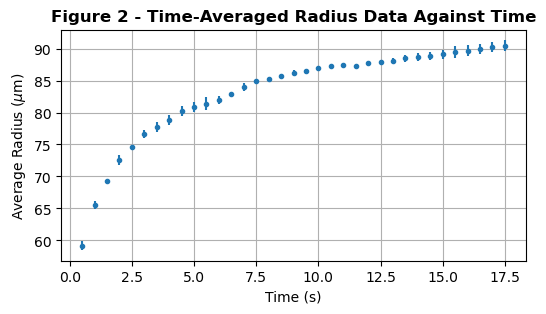

In [5]:
# creating figure
plt.figure()

# plotting time-average values of R based on the 3 experiments' data
plt.errorbar(time, radius_avg, yerr = radius_std, fmt = '.')

# setting axis labels and setting the title
plt.xlabel("Time (s)")
plt.ylabel(r"Average Radius ($\mu$m)")
plt.title("Figure 2 - Time-Averaged Radius Data Against Time", weight = "bold")
plt.grid()

# displaying the plot
plt.show()

$\textit{Figure 2 - The three data sets from figure 1 averaged, with the standard deviation of the data sets shown as error bars. The axes are the same as in figure 1.}$

To visualise this data further, we can create an animation to show the radius of the drop expanding in real time, alongside the graph shown in figure 2.

In [6]:
# Defines the figure and the axis we will be plotting with
fig, (ax, ax_lin) = plt.subplots(1, 2, figsize = (10, 5), gridspec_kw={'width_ratios': [1.6, 1]})

# Defines the axis for the 1-D plot (frames add onto each other so can be outside of animate function
ax_lin.set(xlim = (0, 18), ylim = (40, 95))

# Defines the axis labels, title and puts a grid on the 1-D plot
ax_lin.set_title("(In one dimension)", weight = 'bold')
ax_lin.set_xlabel("Time, s")
ax_lin.set_ylabel(r"Radius, $\mu m$")
ax_lin.grid()

# Defines the function we will use to animate with
def animate(frame):
    '''
    Used by the FuncAnimation command to create the animation of the radius of the droplet expanding over time.

    Variables:
    ------------------------------
    frame : INTEGER
    '''
    # Clears the first axis each frame (the one with our circle)
    ax.clear()
    
    # Sets our x and y axis limits for the plots
    ax.set(xlim = (0, 200), ylim = (0, 200))
    
    # Sets titles and axis labels
    ax.set_title("Figure 3 - How the Size of the Droplet Increases in Real Time", weight = 'bold')
    ax.set_xlabel(r"Distance scale, $\mu m$")
    ax.set_ylabel(r"Distance scale, $\mu m$")

    # Plots our circle with the radius value corresponding to the current frame
    droplet = Circle((100, 100), radius_avg[frame])
    ax.add_patch(droplet)

    ax_lin.errorbar(time[frame], radius_avg[frame], yerr = radius_std[frame], fmt = '.r', label = "Average radius")
    ax_lin.legend(bbox_to_anchor = [13, 10], fancybox = True, shadow = True)
    
    # Shows time elapsed on the plot
    ax.text(120, 190, f"Time elapsed: {frame*0.5 + 0.5}s", weight = 'bold')

# Creates an object to hold our animation
anim = FuncAnimation(fig, animate, frames = range(len(radius_avg)), interval = 500)

# Creates a video
video = anim.to_html5_video()

# Displays the video
html = display.HTML(video)
display.display(html)
plt.close()

$\textit{Figure 3- A video showing the plot seen in figure 1 to the right, and a 2D visualisation of the droplet expanding to the left, evolving in real time}$.

## Extracting Useful Quantities Using Experimental Data

In order to find the spreading law (a relationship between the speed of the contact line ($U$) and the contact angle ($\theta$)), we need to first find the quantities themselves, i.e express $U$ and $\theta$ using $R=R(t)$. 

To speed of the contact line can be calculated using $U = \frac{dR}{dt} \approx \frac{R(t+\delta t)-R(t)}{\delta t}$, where $R(t+\delta t)$ and $R(t)$ are two sequential values of the footprint radii measured with time intreval $\delta t$ apart.  

To find the contact angle, we make the spherical cap approximation that allows us to calculate the height of the drop ($H$) from its volume ($V=7.6$ pL) and its footprint radius ($R$) which are known from experiments via the relationship $V=\frac{\pi}{6}H(3R^2+H^2)$. The contact angle can then be found from $R$ and $H$ using $\theta = \frac{\pi}{2} - \mathrm{arctan}\frac{R^2-H^2}{2HR}$. 

There are three sets of experimental data, so for each one of them a relationship $U=U(\theta)$ can be found.

### Finding $H$

To find $H$ and its corresponding uncertainty, we first rearrange the formula $V=\frac{\pi}{6}H(3R^2+H^2)$. We may also acknowledge that $V=7.6$pL $=7600\mu$m$^3$, to ensure all quantities are in the same units. Therefore we have the equation $H^3 + 3R^2H - \frac{6V}{\pi} = 0$, which can be solved as an implicit equation. To do this, we can use the fsolve function for each radius data set to produce three data sets for $H$. Using the same prinicple as before, we may calculate the standard deviation of these seperate data sets for $H$ and likewise create an array for the mean $H$.

In [7]:
# Set V as a global constant
V = 7600 #mcm^3

def cubic_h(H, R):
    '''
    The cubic function in H that we will pass our values R and test values of H through.

    Variables:
    ----------------------
    H : FLOAT
    R : FLOAT
    '''
    H = H[0] # To avoid deprecation warning
    func = (pow(H, 3)) + (3 * pow(R, 2) * H) - ((6 * V) / np.pi) 
    return func

# Uses fsolve to calculate the values of H based on all 3 of the original radius data sets
h_1 = np.array([opt.fsolve(cubic_h, 0, radius_data1[i])[0] for i in range(len(time))])
h_2 = np.array([opt.fsolve(cubic_h, 0, radius_data2[i])[0] for i in range(len(time))])
h_3 = np.array([opt.fsolve(cubic_h, 0, radius_data1[i])[0] for i in range(len(time))])

# Calculates a time averaged H in a similar fashion to what we did for R
h_avg = np.array([((h_1[i] + h_2[i] + h_3[i]) / 3) for i in range(len(time))])

# Calculates the standard deviation (which we will again consider analagous to the uncertainty) of H
h_std = np.array([np.sqrt((pow(h_1[i] - h_avg[i], 2) + pow(h_2[i] - h_avg[i], 2) \
                                + pow(h_3[i] - h_avg[i], 2)) / 3) for i in range(len(time))])

### Relating $R$ and $H$ to $\theta$

As seen above, we have the approximation that $\theta = \frac{\pi}{2} - \arctan{\frac{R^2-H^2}{2RH}}$. Using our mean arrays for $R$ and $H$ and associated uncertainties, we may find a similar array for $\theta$ and its uncertainty. The uncertainty in $\theta$ may be found using the formula $\delta \theta = \sqrt{(\frac{\partial \theta}{\partial R} \delta R)^2 + (\frac{\partial \theta}{\partial H} \delta H)^2}$.

We can work out that 
$\frac{\partial \theta}{\partial R} = -\frac{2H}{R^2 + H^2}$ and
$\frac{\partial \theta}{\partial H} = \frac{2R}{R^2 + H^2}$.

Therefore, we have that $\delta \theta = \sqrt{\frac{4H^2}{(R^2 + H^2)^2}(\delta R)^2 + \frac{4R^2}{(R^2 + H^2)^2}(\delta H)^2}$ for each value of $\theta$. We can plot this against time, $t$, to visualise the data.

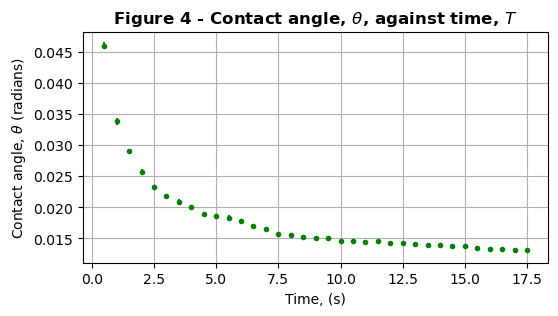

In [8]:
# Creating an array of contact angle theta using our average values of R and H
theta =  np.array([(np.pi / 2) - np.arctan((pow(radius_avg[i], 2) - pow(h_avg[i], 2))\
                        / (2 * radius_avg[i] * h_avg[i])) for i in range(len(time))])

# Creating an array of contact angle uncertainty using the above equation
theta_std = np.array([np.sqrt((((4 * pow(h_avg[i], 2)) / pow((pow(radius_avg[i], 2) + pow(h_avg[i], 2)), 2)) * pow(radius_std[i], 2)) + \
                     (((4 * pow(radius_avg[i], 2)) / pow((pow(radius_avg[i], 2) + pow(h_avg[i], 2)), 2)) * pow(h_std[i], 2))) for i in range(len(time))])

# Creating figure for theta plot
plt.figure()

# Plotting theta and its uncertainty against time
plt.errorbar(time, theta, yerr = theta_std, fmt = "g.")

# Setting labels and title
plt.title(r"Figure 4 - Contact angle, $\theta$, against time, $T$", weight = 'bold')
plt.xlabel("Time, (s)")
plt.ylabel(r"Contact angle, $\theta$ (radians)")
plt.grid()

# Show plot
plt.show()

$\textit{Figure 4 - Graph of average (of the three data sets) contact angle, in radians on the y-axis against time in seconds.}$

### Finding the Speed, $U(\theta)$

As mentioned previously, we may find the speed $U$ of the droplet as it spreads using the fact that $U = \frac{dR}{dt} \approx \frac{R(t+\delta t) - R(t)}{\delta t}$, i.e we can find the speed of each interval between consecutive values of $R$ for each experiment. Similar to our previous approach, we will find $U$ for each radius data set, create an average speed $U$ and finally, find the standard deviation of the arrays to create an uncertainty.

Due to the gradient nature of speed, there will always be one less value in its array than the original radius/distance data it is derived from, and so we create a new time array that is identical to the original one except the final value is omitted. We choose this value due to the high density of points in this region of the data.

We can then visualise this data by plotting the mean speed $U$ against time, with errors.

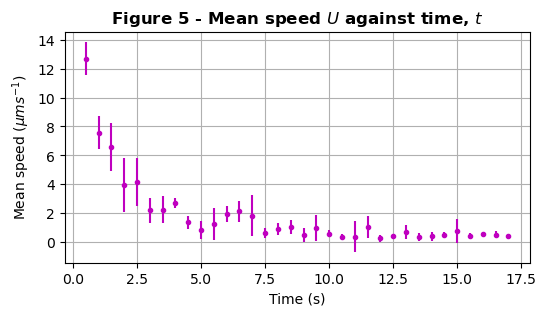

In [9]:
# We find U for each experiment, using consecutive values of R over the interval of 0.5s. Units of mcm/s.
U_1 = np.array([((radius_data1[i+1] - radius_data1[i]) / 0.5) for i in range(len(time) - 1)])
U_2 = np.array([((radius_data2[i+1] - radius_data2[i]) / 0.5) for i in range(len(time) - 1)])
U_3 = np.array([((radius_data3[i+1] - radius_data3[i]) / 0.5) for i in range(len(time) - 1)])

# Creates a new array for time specifically for U as our array for U has one less value than the original time array.
# We choose to remove the final point of data as it is the least significant.
time_U = np.array([time[i] for i in range(len(time) - 1)])

# Creates an array for the mean speed based on all 3 experiments.
U_avg = np.array([np.abs(((U_1[i] + U_2[i] + U_3[i]) / 3)) for i in range(len(time_U))])

# Creates an array for the standard deviation of the mean speed.
U_std = np.array([np.sqrt((pow(U_1[i] - U_avg[i], 2) + pow(U_2[i] - U_avg[i], 2) \
                           + pow(U_3[i] - U_avg[i], 2)) / 3) for i in range(len(time_U))])

# Creates figure for average speed U against time t
plt.figure()

# Plots figure
plt.errorbar(time_U, U_avg, yerr = U_std, fmt = "m.")

# Sets labels and titles
plt.title(r"Figure 5 - Mean speed $U$ against time, $t$", weight = 'bold')
plt.ylabel(r"Mean speed ($\mu m s^{-1}$)")
plt.xlabel("Time (s)")
plt.grid()

# Shows figure
plt.show()

$\textit{Figure 5 - Graph of mean speed of the spread of the droplet, in micrometers per second, against time in seconds}$.

Now we have the mean speed $U$ and the contact angle $\theta$ against time, we can make a plot of $U(\theta)$ against $\theta$. We remove one data point from the end of the $\theta$ array to match the altered time array (as explained previously) and are then able to make the plot.

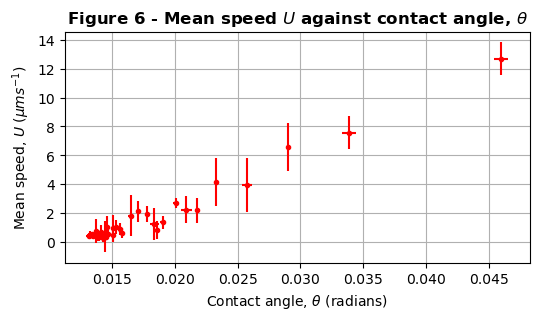

In [10]:
# We make an amendment to the contact angle array to remove the final value to make U and theta arrays the same size.
theta_new = np.array([theta[i] for i in range(len(time_U))])
theta_std_new = np.array([theta_std[i] for i in range(len(time_U))])

# Creates figure for U against theta
plt.figure()

# Plots data
plt.errorbar(theta_new, U_avg, xerr = theta_std_new, yerr = U_std, fmt = 'r.')

# Labels and title
plt.title(r"Figure 6 - Mean speed $U$ against contact angle, $\theta$", weight = 'bold')
plt.xlabel(r"Contact angle, $\theta$ (radians)")
plt.ylabel(r"Mean speed, $U$ ($\mu ms^{-1}$)")
plt.grid()

# Shows figure
plt.show()

$\textit{Figure 6 - Graph of mean spreading speed in micrometers per second against mean contact speed in radians. This is the plot that we will fit our spreading models to.}$

Now we have all we need to begin fitting the data to a known spreading model. We have two laws to choose from, the Cox-Voinov and the de Gennes spreading laws, although there are others. 

## Fitting the Cox-Voinov Law 

We first attempt to fit the above data to the Cox-Voinov spreading law, given by $U(\theta) = U_0(\theta^{3} - \theta _{0}^{3})$, using scipy's curve_fit function. This function only takes into account the errors on the y-axis, ($\sigma_U$), but as we can see from the plot of contact angle, $\theta$, against time, the uncertainty on the contact angle data points are approximately negligible compared to the uncertainty in the corresponding value of $U$. This makes curve_fit a valid approach, and it will find the constant parameters $U_0$ and $\theta_0$ via a non-linear least squares to isolate the best values of these parameters to fit our data.

We will plot the data along with the best fit for the Cox-Voinov spreading law and its residuals, with the value of the reduced $\chi ^{2}$ displayed on the figure. The reduced $\chi ^{2}$ is a useful statistical tool that allows us to quanitfy the quality of a model compared to the original data points it is based from. This, alongside the plot of residuals (the deviation of our data points from the model curve), will be critical in determining the validity of each model.

We will go on to calculate the 'expected' uncertainty in the mean speed, which we will call $\sigma_{y_{fit}}$, which represents the uncertainty that best fits the model that the curve_fit function will find. How this expected uncertainty $\sigma_{y_{fit}}$ compares to the mean standard deviation of the mean $U$ array is another measure of whether a particular fit is appropriate - if $\sigma_{y_{fit}}$ ~ $\sigma_{U_{mean}}$ then the model is a good fit for our data.

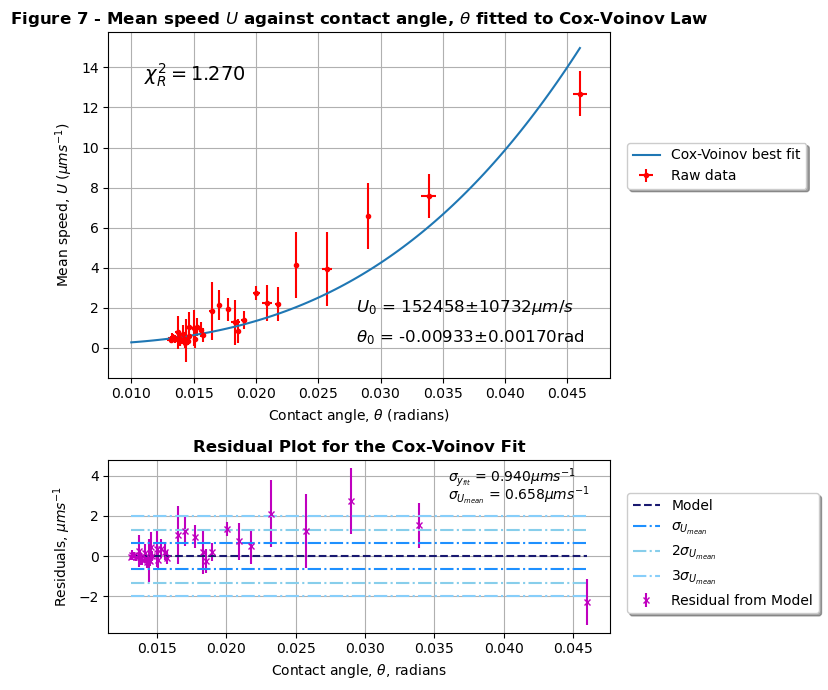

In [11]:
# Defining a function to run the Cox-Voinov law
def cox_voinov(theta, U_0, theta_0):
    '''
    Returns the value of the Cox-Voinov spreading law based on given parameters

    Variables:
    ----------------------
    theta : ARRAY
    U_0 : FLOAT
    theta_0 : FLOAT
    '''
    
    function = U_0 * ((theta ** 3) - pow(theta_0, 3))
    return function

# Performs the curve fit function via a least squares optimisation method
param1, cov1 = opt.curve_fit(cox_voinov, theta_new, U_avg, sigma = U_std, absolute_sigma = True)


# Now we will find the chi-squared for the Cox-Voinov fit by comparing the model to our data:
#----------------------------------------------------------------------------------------------------------
# Finds the value of U that the best fit model would produce for each value of contact angle
model_U_cv = cox_voinov(theta_new, param1[0], param1[1])

# Calculates the reduced chi-squared value and prints it, along with the number of degrees of freedom.
redu_chi_sq = np.sum((((U_avg - model_U_cv) / U_std) ** 2) / (np.size(theta_new) - 2))

# We will now plot the optimal curve on the data, and display the optimised values of U_0 and theta_0 on the figure as a legend
#----------------------------------------------------------------------------------------------------------
# Sets figure and axes for main plot and residuals
fig, (ax1, ax2) = plt.subplots(2, figsize = (8, 7), gridspec_kw={'height_ratios': [2, 1]})

# Plots the original data
ax1.errorbar(theta_new, U_avg, xerr = theta_std_new, yerr = U_std, fmt = 'r.', label = "Raw data")

# Creates new data along the optimised "best fit" line
x_data1 = np.linspace(0.01, np.max(theta_new), 100)
y_data1 = cox_voinov(x_data1, param1[0], param1[1])

# Plots optimised line to compare to original data
ax1.plot(x_data1, y_data1, label = "Cox-Voinov best fit")

# Sets title and axis labels
ax1.set_title(r"Figure 7 - Mean speed $U$ against contact angle, $\theta$ fitted to Cox-Voinov Law", weight = 'bold')
ax1.set_xlabel(r"Contact angle, $\theta$ (radians)")
ax1.set_ylabel(r"Mean speed, $U$ ($\mu ms^{-1}$)")

# Sets legend and grid spacing
ax1.text(0.028, 2, rf"$U_0$ = {param1[0]:.6g}$\pm${np.sqrt(cov1[0][0]):.5g}$\mu m/s$", fontsize = 12, va = 'center')
ax1.text(0.028, 0.5, rf"$\theta_0$ = {param1[1]:.5f}$\pm${np.sqrt(cov1[1][1]):.5f}rad", fontsize = 12, va = 'center')
ax1.text(0.011, 13.6, rf"$\chi_R^{2} = {redu_chi_sq:.3f}$", fontsize = 14, va = "center") # Displays reduced chi-squared on graph
ax1.legend(bbox_to_anchor = (1.02,0.7), fancybox = True, shadow = True)
ax1.grid()

# Now we make a plot of residuals:
#----------------------------------------------------------------------------------------------------------
# Finds the residuals and expected uncertainty of the fit
residual = (U_avg - model_U_cv)
expected_unc = np.sqrt((1 / (np.size(theta_new) - 2)) * np.sum(residual ** 2))

# Plots the residuals on a scatter plot along with the uncertainty (standard deviation)
ax2.errorbar(theta_new, residual, yerr = U_std, fmt = 'mx', markersize = '4', label = 'Residual from Model')

# Plots a series of horizontal lines to make the spread of data compared to the expected standard deviation clear.
ax2.hlines(0, xmin = np.min(theta_new), xmax = np.max(theta_new), color = 'midnightblue', linestyles = '--', label = 'Model')
ax2.hlines(np.mean(U_std), xmin = np.min(theta_new), xmax = np.max(theta_new), color = 'dodgerblue', linestyles = '-.', label = r'$\sigma_{U_{mean}}$')
ax2.hlines(-np.mean(U_std), xmin = np.min(theta_new), xmax = np.max(theta_new), color = 'dodgerblue', linestyles = '-.')
ax2.hlines(2*np.mean(U_std), xmin = np.min(theta_new), xmax = np.max(theta_new), color = 'skyblue', linestyles = '-.', label = r'2$\sigma_{U_{mean}}$')
ax2.hlines(-2*np.mean(U_std), xmin = np.min(theta_new), xmax = np.max(theta_new), color = 'skyblue', linestyles = '-.')
ax2.hlines(3*np.mean(U_std), xmin = np.min(theta_new), xmax = np.max(theta_new), color = 'lightskyblue', linestyles = '-.', label = r'3$\sigma_{U_{mean}}$')
ax2.hlines(-3*np.mean(U_std), xmin = np.min(theta_new), xmax = np.max(theta_new), color = 'lightskyblue', linestyles = '-.')


# Sets labels and title of plot, puts on grid lines
ax2.set_ylabel(r'Residuals, $\mu ms^{-1}$')
ax2.set_xlabel(r'Contact angle, $\theta$, radians')
ax2.set_title('Residual Plot for the Cox-Voinov Fit', weight = 'bold')
ax2.grid()

# Displays the 'expected' y-fit uncertainty
text1 = r'$\sigma_{y_{fit}}$'
text2 = r'$\mu ms^{-1}$'
ax2.text(0.036, 3.7, rf'{text1} = {expected_unc:.3f}{text2}')

# Displays the mean uncertainty in the speed U to compare to the expected uncertainty.
text3 = r'$\sigma_{U_{mean}}$'
ax2.text(0.036, 2.8, rf'{text3} = {np.mean(U_std):.3f}{text2}')

# Configures legend
ax2.legend(bbox_to_anchor = (1.02, 0.85), fancybox = True, shadow = True)
fig.tight_layout()

$\textit{Figure 7 - The plot shown in figure 6 (top), with the data fitted to the Cox-Voinov spreading law. Residual plot (bottom) is shown with the expected uncertainty from the model fit and the uncertainty extracted from the data. The reduced chi-squared for the fit is 1.27.}$ 


We can see from figure 7 that the expected standard deviation for a perfect Cox-Voinov model for our data, $\sigma_{y_{fit}}$ , is 42% larger than the mean standard deviation of the experimentally obtained values of $U$, meaning that this, while not a bad fit, could be better. A $\chi_{R}^{2}$ value of 1.27 indicates that our uncertainties are too small for this to be a perfect fit. We will analyse these values more in a subsequent section, where we will compare them to those produced with a de Gennes spreading law model.

## Fitting the de Gennes Law

Following the Cox-Voinov law fit, we will now fit the same data to a different but similar law, de Gennes Law, given by $U(\theta) = U_{0}(\theta ^{2} - \theta_{0}^{2})$. Like before, we will plot the data along with the best model fit of the de Gennes law, with the residuals and reduced $\chi ^{2}$ displayed as before. Afterwards, we will compare both the Cox-Voinov and de Gennes laws and determine which is the more appropriate fit for our data.

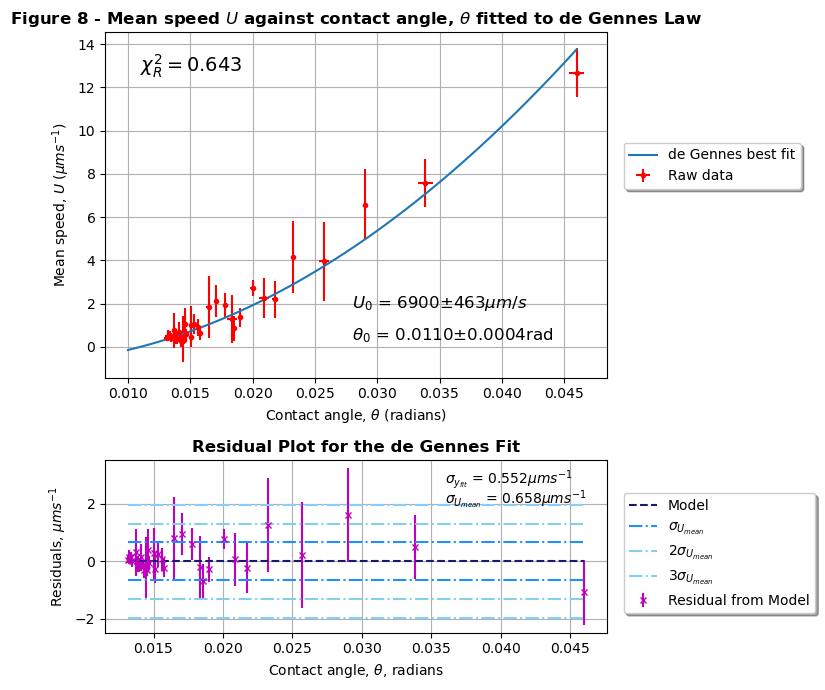

In [12]:
# Define a function to model the de Gennes Law
def de_gennes(theta, U_0, theta_0):
    '''
    Returns the value of the de Gennes spreading law based on given parameters.

    Variables:
    ----------------------
    theta : ARRAY
    U_0 : FLOAT
    theta_0 : FLOAT
    '''

    function = U_0 * ((theta ** 2) - pow(theta_0, 2))
    return function

# performs the curve fit function via a least squares optimisation method (and give some starting guesses)
param2, cov2 = opt.curve_fit(de_gennes, theta_new, U_avg, p0 = [1000, 0.01], sigma = U_std, absolute_sigma = True)

# Now we will find the chi-squared for the de Gennes fit by comparing the model to our data:
#----------------------------------------------------------------------------------------------------------
# Finds the value of U that the best fit model would produce for each value of contact angle
model_U_dg = de_gennes(theta_new, param2[0], param2[1])

# Calculates the reduced chi-squared value and prints it, along with the number of degrees of freedom.
redu_chi_sq_dg = np.sum((((U_avg - model_U_dg) / U_std) ** 2) / (len(theta_new) - 2))

# Now plotting the data, the model de Gennes fit and the residuals
#----------------------------------------------------------------------------------------------------------
# Creating the figure
fig, (ax3, ax4) = plt.subplots(2, figsize = (8, 7), gridspec_kw={'height_ratios': [2, 1]})

# Plotting original data
ax3.errorbar(theta_new, U_avg, xerr = theta_std_new, yerr = U_std, fmt = 'r.', label = "Raw data")

# Creates new data along the optimised "best fit" line
x_data2 = np.linspace(0.01, np.max(theta_new), 100)
y_data2 = de_gennes(x_data2, param2[0], param2[1])

# Plots optimised line to compare to original data
ax3.plot(x_data2, y_data2, label = "de Gennes best fit")

# Sets title and axis labels
ax3.set_title(r"Figure 8 - Mean speed $U$ against contact angle, $\theta$ fitted to de Gennes Law", weight = 'bold')
ax3.set_xlabel(r"Contact angle, $\theta$ (radians)")
ax3.set_ylabel(r"Mean speed, $U$ ($\mu ms^{-1}$)")

# Sets legend and grid spacing
ax3.text(0.028, 2, rf"$U_0$ = {param2[0]:.4g}$\pm${np.sqrt(cov2[0][0]):.3g}$\mu m/s$", fontsize = 12, va = 'center')
ax3.text(0.028, 0.5, rf"$\theta_0$ = {param2[1]:.4f}$\pm${np.sqrt(cov2[1][1]):.4f}rad", fontsize = 12, va = 'center')
ax3.text(0.011, 13, rf"$\chi_R^{2} = {redu_chi_sq_dg:.3f}$", fontsize = 14, va = "center") # Displays reduced chi-squared on graph
ax3.legend(bbox_to_anchor = (1.02,0.7), fancybox = True, shadow = True)
ax3.grid()

# Now we make a plot of residuals:
#----------------------------------------------------------------------------------------------------------
# Finds the residuals and expected uncertainty of the fit based on those residuals
residual_dg = (U_avg - model_U_dg)
expected_unc_dg = np.sqrt((1 / (np.size(theta_new) - 2)) * np.sum(residual_dg ** 2))

# Plots the residuals on a scatter plot along with the uncertainty (standard deviation)
ax4.errorbar(theta_new, residual_dg, yerr = U_std, fmt = 'mx', markersize = '4', label = 'Residual from Model')

# Plots a series of horizontal lines to make the spread of data compared to the expected standard deviation clear.
ax4.hlines(0, xmin = np.min(theta_new), xmax = np.max(theta_new), color = 'midnightblue', linestyles = '--', label = 'Model')
ax4.hlines(np.mean(U_std), xmin = np.min(theta_new), xmax = np.max(theta_new), color = 'dodgerblue', linestyles = '-.', label = r'$\sigma_{U_{mean}}$')
ax4.hlines(-np.mean(U_std), xmin = np.min(theta_new), xmax = np.max(theta_new), color = 'dodgerblue', linestyles = '-.')
ax4.hlines(2*np.mean(U_std), xmin = np.min(theta_new), xmax = np.max(theta_new), color = 'skyblue', linestyles = '-.', label = r'2$\sigma_{U_{mean}}$')
ax4.hlines(-2*np.mean(U_std), xmin = np.min(theta_new), xmax = np.max(theta_new), color = 'skyblue', linestyles = '-.')
ax4.hlines(3*np.mean(U_std), xmin = np.min(theta_new), xmax = np.max(theta_new), color = 'lightskyblue', linestyles = '-.', label = r'3$\sigma_{U_{mean}}$')
ax4.hlines(-3*np.mean(U_std), xmin = np.min(theta_new), xmax = np.max(theta_new), color = 'lightskyblue', linestyles = '-.')

# Sets labels and title of plot, puts on grid lines
ax4.set_ylabel(r'Residuals, $\mu ms^{-1}$')
ax4.set_xlabel(r'Contact angle, $\theta$, radians')
ax4.set_title('Residual Plot for the de Gennes Fit', weight = 'bold')
ax4.grid()

# Displays the 'expected' y-fit uncertainty
ax4.text(0.036, 2.7, rf'{text1} = {expected_unc_dg:.3f}{text2}')

# Displays the mean uncertainty in the speed U to compare to the expected uncertainty.
ax4.text(0.036, 2.0, rf'{text3} = {np.mean(U_std):.3f}{text2}')

# Configures legend
ax4.legend(bbox_to_anchor = (1.02, 0.85), fancybox = True, shadow = True)
fig.tight_layout()

$\textit{Figure 8 - The plot shown in figure 6 (top), with the data fitted to the de Gennes spreading law. Residual plot (bottom) is shown with the expected uncertainty from the model fit and the uncertainty extracted from the data. The reduced chi-squared for the fit is 0.643.}$ 

## Comparing Results from Cox-Voinov and de Gennes Laws - Conclusion

### Which is the best model for this data?

$\textbf{The best model to fit this data is the de Gennes spreading law.}$ This is evident from investigating the residuals of the two model fits, and comparing the average uncertainty of the data for mean speed of the droplet $U$, to the 'expected uncertainty' given by the models.

### Analysis

The Cox-Voinov law residual plot in figure 7 shows 3 data points outside of 3 standard deviations from the model mean - which is a very unlikely result, given that we would expect 99.7% of the values to be within 3 standard deviations of the model line, hence we would expect only 0.3% of our data points to be outside of this range. However, given we have 3 out 34 values outside of 3 standard deviations from the model line, that corresponds to 8.8% of values - significantly above 0.3%.

Contrastingly, the residual plot from the de Gennes law model fit, shown in figure 8, shows no data points outside of 3 standard deviations from the model line, and only one value outside of 2 standard deviations. Given that we would expect 95% of values to be inside of 2 standard deviations, the de Gennes model appears to fit the data in a much tighter fashion.

The $\chi_{R}^{2}$ values for the Cox-Voinov and de Gennes laws paint a similar picture. For the Cox-Voinov fit, we had $\chi_{R}^{2}$ = 1.270, which despite being close to 1, does imply that the data's uncertainty was too small for the model, an indication that the model isn't quite a perfect fit. On the other hand, the de Gennes law model fit gave a value of $\chi_{R}^{2}$ = 0.643, which, while smaller than 1, implies that this is a good fit, but that instead our uncertainties are a little too large. In truth, these values do little to distinguish the comparative validity of the models given their proximity to the optimal value of 1, but fortunately we have one more way to prove the case that the de Gennes law is the more appropriate model.

Let us analyse the 'expected' standard deviation based on the model and its residuals, $\sigma_{y_{fit}}$, for each model and compare that to the average standard deviation of the mean speed data, $\sigma_{U_{mean}}$. We had that $\sigma_{U_{mean}}$ = 0.658$\mu ms^{-1}$, and for the Cox-Voinov fit we had $\sigma_{y_{fit}}$ = 0.940$\mu ms^{-1}$, which we can clearly see is 42% larger than the mean standard deviation of the data. However, for the de Gennes law, we had $\sigma_{y_{fit}}$ = 0.552$\mu ms^{-1}$, which is only a mere 16% deviation from the mean standard deviation of our data for $U$.

To conclude, we can see that the best fit model for this data is the de Gennes law model, due to the residuals plot being much tighter, and a more accurate expected uncertainty prediction compared to that of the Cox-Voinov law model.

# Extension for Project 1

## Fitting a General Quadratic to The Data

For the extension, we begin by fitting the general quadratic $U(\theta) = A + B'\theta + U_{0}\theta^{2}$ to the data for mean $U$ and $\theta$. A very similar analysis to what was done for the Cox-Voinov and de Gennes spreading laws can be repeated here, including the production of both a $\chi_{R}^{2}$ value, a residual plot and a value for 'expected uncertainty' based on the model alone, $\sigma_{y_{fit}}$.

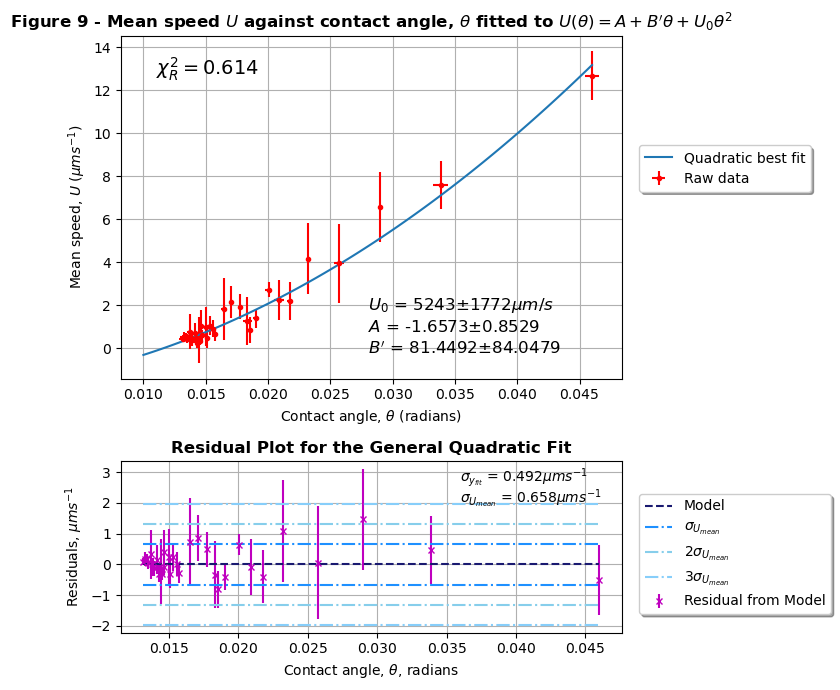

In [13]:
# Define a function to model the quadratic model
def quadratic(theta, U_0, A, B):
    '''
    Returns the value of the general quadratic function of theta based on given parameters.

    Variables:
    ----------------------
    theta : ARRAY
    U_0 : FLOAT
    A : FLOAT
    B: FLOAT
    '''

    function = A + (B * theta) + (U_0 * (theta ** 2))
    return function

# performs the curve fit function via a least squares optimisation method (and give some starting guesses)
param3, cov3 = opt.curve_fit(quadratic, theta_new, U_avg, p0 = [0, 0, 1000], sigma = U_std, absolute_sigma = True)

# Now we will find the chi-squared for the quadratic fit by comparing the model to our data:
#----------------------------------------------------------------------------------------------------------
# Finds the value of U that the best fit model would produce for each value of contact angle
model_U_qu = quadratic(theta_new, param3[0], param3[1], param3[2])

# Calculates the reduced chi-squared value and prints it, along with the number of degrees of freedom.
redu_chi_sq_qu = np.sum((((U_avg - model_U_qu) / U_std) ** 2) / (np.size(theta_new) - 2))

# Now plotting the data, the model quadratic fit and the residuals
#----------------------------------------------------------------------------------------------------------
# Creating the figure
fig, (ax5, ax6) = plt.subplots(2, figsize = (8, 7), gridspec_kw={'height_ratios': [2, 1]})

# Plotting original data
ax5.errorbar(theta_new, U_avg, xerr = theta_std_new, yerr = U_std, fmt = 'r.', label = "Raw data")

# Creates new data along the optimised "best fit" line
x_data3 = np.linspace(0.01, np.max(theta_new), 100)
y_data3 = quadratic(x_data3, param3[0], param3[1], param3[2])

# Plots optimised line to compare to original data
ax5.plot(x_data3, y_data3, label = "Quadratic best fit")

# Sets title and axis labels
ax5.set_title(r"Figure 9 - Mean speed $U$ against contact angle, $\theta$ fitted to $U(\theta) = A + B'\theta + U_{0}\theta^2$", weight = 'bold')
ax5.set_xlabel(r"Contact angle, $\theta$ (radians)")
ax5.set_ylabel(r"Mean speed, $U$ ($\mu ms^{-1}$)")

# Sets legend and grid spacing
ax5.text(0.028, 2, rf"$U_0$ = {param3[0]:.4g}$\pm${np.sqrt(cov3[0][0]):.4g}$\mu m/s$", fontsize = 12, va = 'center')
ax5.text(0.028, 1, rf"$A$ = {param3[1]:.4f}$\pm${np.sqrt(cov3[1][1]):.4f}", fontsize = 12, va = 'center')
ax5.text(0.028, 0, rf"$B'$ = {param3[2]:.4f}$\pm${np.sqrt(cov3[2][2]):.4f}", fontsize = 12, va = 'center')
ax5.text(0.011, 13, rf"$\chi_R^{2} = {redu_chi_sq_qu:.3f}$", fontsize = 14, va = "center") # Displays reduced chi-squared on graph
ax5.legend(bbox_to_anchor = (1.02,0.7), fancybox = True, shadow = True)
ax5.grid()

# Now we make a plot of residuals:
#----------------------------------------------------------------------------------------------------------
# Finds the residuals and expected uncertainty of the fit based on those residuals
residual_qu = (U_avg - model_U_qu)
expected_unc_qu = np.sqrt((1 / (np.size(theta_new) - 2)) * np.sum(residual_qu ** 2))

# Plots the residuals on a scatter plot along with the uncertainty (standard deviation)
ax6.errorbar(theta_new, residual_qu, yerr = U_std, fmt = 'mx', markersize = '4', label = 'Residual from Model')

# Plots a series of horizontal lines to make the spread of data compared to the expected standard deviation clear.
ax6.hlines(0, xmin = np.min(theta_new), xmax = np.max(theta_new), color = 'midnightblue', linestyles = '--', label = 'Model')
ax6.hlines(np.mean(U_std), xmin = np.min(theta_new), xmax = np.max(theta_new), color = 'dodgerblue', linestyles = '-.', label = r'$\sigma_{U_{mean}}$')
ax6.hlines(-np.mean(U_std), xmin = np.min(theta_new), xmax = np.max(theta_new), color = 'dodgerblue', linestyles = '-.')
ax6.hlines(2*np.mean(U_std), xmin = np.min(theta_new), xmax = np.max(theta_new), color = 'skyblue', linestyles = '-.', label = r'2$\sigma_{U_{mean}}$')
ax6.hlines(-2*np.mean(U_std), xmin = np.min(theta_new), xmax = np.max(theta_new), color = 'skyblue', linestyles = '-.')
ax6.hlines(3*np.mean(U_std), xmin = np.min(theta_new), xmax = np.max(theta_new), color = 'lightskyblue', linestyles = '-.', label = r'3$\sigma_{U_{mean}}$')
ax6.hlines(-3*np.mean(U_std), xmin = np.min(theta_new), xmax = np.max(theta_new), color = 'lightskyblue', linestyles = '-.')

# Sets labels and title of plot, puts on grid lines
ax6.set_ylabel(r'Residuals, $\mu ms^{-1}$')
ax6.set_xlabel(r'Contact angle, $\theta$, radians')
ax6.set_title('Residual Plot for the General Quadratic Fit', weight = 'bold')
ax6.grid()

# Displays the 'expected' y-fit uncertainty
ax6.text(0.036, 2.7, rf'{text1} = {expected_unc_qu:.3f}{text2}')

# Displays the mean uncertainty in the speed U to compare to the expected uncertainty.
ax6.text(0.036, 2.0, rf'{text3} = {np.mean(U_std):.3f}{text2}')

# Configures legend
ax6.legend(bbox_to_anchor = (1.02, 0.85), fancybox = True, shadow = True)
fig.tight_layout()

$\textit{Figure 9 - The plot shown in figure 6 (top), with the data fitted to a general quadratic fit. Residual plot (bottom) is shown with the expected uncertainty from the model fit and the uncertainty extracted from the data. The reduced chi-squared for the fit is 0.614.}$ 

## Fitting a General Cubic to The Data

Now we will do the exact same thing but instead use a general cubic, such as $U(\theta) = A + B'\theta + C'\theta^{2} + U_{0}\theta^{3}$. Afterward, we will compare the value of $U_{0}$ found using these methods to the values found using the Cox-Voinov and de Gennes fit.

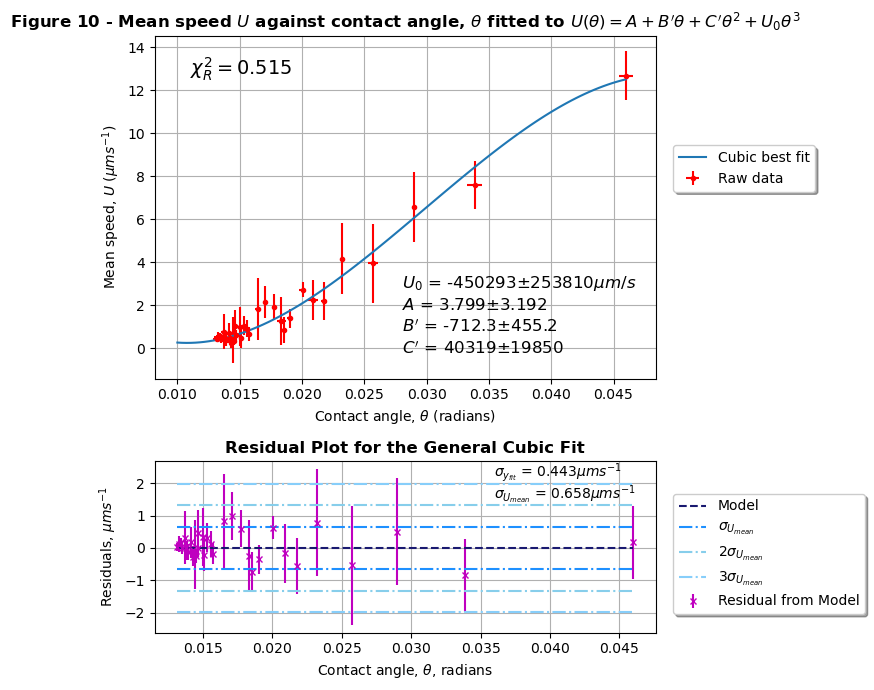

In [14]:
# Define a function to model the cubic model
def cubic(theta, U_0, A, B, C):
    '''
    Returns the value of the general cubic function of theta based on given parameters.

    Variables:
    ----------------------
    theta : ARRAY
    U_0 : FLOAT
    A : FLOAT
    B : FLOAT
    C : FLOAT
    '''

    function = A + (B * theta) + (C * (theta ** 2)) + (U_0 * (theta ** 3))
    return function

# performs the curve fit function via a least squares optimisation method (and give some starting guesses)
param4, cov4 = opt.curve_fit(cubic, theta_new, U_avg, sigma = U_std, absolute_sigma = True)

# Now we will find the chi-squared for the cubic fit by comparing the model to our data:
#----------------------------------------------------------------------------------------------------------
# Finds the value of U that the best fit model would produce for each value of contact angle
model_U_cu = cubic(theta_new, param4[0], param4[1], param4[2], param4[3])

# Calculates the reduced chi-squared value and prints it.
redu_chi_sq_cu = np.sum((((U_avg - model_U_cu) / U_std) ** 2) / (np.size(theta_new) - 2))

# Now plotting the data, the model quadratic fit and the residuals
#----------------------------------------------------------------------------------------------------------
# Creating the figure
fig, (ax7, ax8) = plt.subplots(2, figsize = (8, 7), gridspec_kw={'height_ratios': [2, 1]})

# Plotting original data
ax7.errorbar(theta_new, U_avg, xerr = theta_std_new, yerr = U_std, fmt = 'r.', label = "Raw data")

# Creates new data along the optimised "best fit" line
x_data4 = np.linspace(0.01, np.max(theta_new), 100)
y_data4 = cubic(x_data4, param4[0], param4[1], param4[2], param4[3])

# Plots optimised line to compare to original data
ax7.plot(x_data4, y_data4, label = "Cubic best fit")

# Sets title and axis labels
ax7.set_title(r"Figure 10 - Mean speed $U$ against contact angle, $\theta$ fitted to $U(\theta) = A + B'\theta + C'\theta^2 + U_{0}\theta^3$", weight = 'bold')
ax7.set_xlabel(r"Contact angle, $\theta$ (radians)")
ax7.set_ylabel(r"Mean speed, $U$ ($\mu ms^{-1}$)")

# Sets legend and grid spacing
ax7.text(0.028, 3, rf"$U_0$ = {param4[0]:.6g}$\pm${np.sqrt(cov4[0][0]):.6g}$\mu m/s$", fontsize = 12, va = 'center')
ax7.text(0.028, 2, rf"$A$ = {param4[1]:.4g}$\pm${np.sqrt(cov4[1][1]):.4g}", fontsize = 12, va = 'center')
ax7.text(0.028, 1, rf"$B'$ = {param4[2]:.4g}$\pm${np.sqrt(cov4[2][2]):.4g}", fontsize = 12, va = 'center')
ax7.text(0.028, 0, rf"$C'$ = {param4[3]:.5g}$\pm${np.sqrt(cov4[3][3]):.5g}", fontsize = 12, va = 'center')
ax7.text(0.011, 13, rf"$\chi_R^{2} = {redu_chi_sq_cu:.3f}$", fontsize = 14, va = "center") # Displays reduced chi-squared on graph
ax7.legend(bbox_to_anchor = (1.02,0.7), fancybox = True, shadow = True)
ax7.grid()

# Now we make a plot of residuals:
#----------------------------------------------------------------------------------------------------------
# Finds the residuals and expected uncertainty of the fit based on those residuals
residual_cu = (U_avg - model_U_cu)
expected_unc_cu = np.sqrt((1 / (np.size(theta_new) - 2)) * np.sum(residual_cu ** 2))

# Plots the residuals on a scatter plot along with the uncertainty (standard deviation)
ax8.errorbar(theta_new, residual_cu, yerr = U_std, fmt = 'mx', markersize = '4', label = 'Residual from Model')

# Plots a series of horizontal lines to make the spread of data compared to the expected standard deviation clear.
ax8.hlines(0, xmin = np.min(theta_new), xmax = np.max(theta_new), color = 'midnightblue', linestyles = '--', label = 'Model')
ax8.hlines(np.mean(U_std), xmin = np.min(theta_new), xmax = np.max(theta_new), color = 'dodgerblue', linestyles = '-.', label = r'$\sigma_{U_{mean}}$')
ax8.hlines(-np.mean(U_std), xmin = np.min(theta_new), xmax = np.max(theta_new), color = 'dodgerblue', linestyles = '-.')
ax8.hlines(2*np.mean(U_std), xmin = np.min(theta_new), xmax = np.max(theta_new), color = 'skyblue', linestyles = '-.', label = r'2$\sigma_{U_{mean}}$')
ax8.hlines(-2*np.mean(U_std), xmin = np.min(theta_new), xmax = np.max(theta_new), color = 'skyblue', linestyles = '-.')
ax8.hlines(3*np.mean(U_std), xmin = np.min(theta_new), xmax = np.max(theta_new), color = 'lightskyblue', linestyles = '-.', label = r'3$\sigma_{U_{mean}}$')
ax8.hlines(-3*np.mean(U_std), xmin = np.min(theta_new), xmax = np.max(theta_new), color = 'lightskyblue', linestyles = '-.')

# Sets labels and title of plot, puts on grid lines
ax8.set_ylabel(r'Residuals, $\mu ms^{-1}$')
ax8.set_xlabel(r'Contact angle, $\theta$, radians')
ax8.set_title('Residual Plot for the General Cubic Fit', weight = 'bold')
ax8.grid()

# Displays the 'expected' y-fit uncertainty
ax8.text(0.036, 2.2, rf'{text1} = {expected_unc_cu:.3f}{text2}')

# Displays the mean uncertainty in the speed U to compare to the expected uncertainty.
ax8.text(0.036, 1.5, rf'{text3} = {np.mean(U_std):.3f}{text2}')

# Configures legend
ax8.legend(bbox_to_anchor = (1.02, 0.85), fancybox = True, shadow = True)
fig.tight_layout()

$\textit{Figure 10 - The plot shown in figure 6 (top), with the data fitted to a general cubic fit. Residual plot (bottom) is shown with the expected uncertainty from the model fit and the uncertainty extracted from the data. The reduced chi-squared for the fit is 0.515.}$ 

## Comparing $U_0$ Values

It is clear that from the general quadratic and cubic fits to the data (figures 9 and 10), the value of $U_0$ produced was very different to the spreading laws (figures 7 and 8) we have previously investigated.

The two laws cubic in $\theta$ are the Cox-Voinov (figure 7) and the general cubic fit (figure 10), which produced values of $U_0$ of 152458$\pm$10732$\mu ms^{-1}$ and -450293$\pm$253810$\mu ms^{-1}$ respectively. It is clear to see that the value of $U_0$ produced by the Cox-Voinox spreading law is more sensible out of the two, given the uncertainty is only ~ 7% opposed to over 56% for the general cubic. There is also the difference in that for the general cubic fit, $U_0$ is negative, while for the Cox-Voinov law it is positive. This discrepancy can be attributed to the fact that these are different models, with the general cubic having more dependency on $\theta$ than the Cox-Voinov law which was only dependent on $\theta$ through a single $\theta^{3}$ term.

The two laws quadratic in $\theta$ are the de Gennes (figure 8) and general quadratic fit (figure 9), which produced values of $U_0$ of 6009$\pm$463$\mu ms^{-1}$ and 5243$\pm$1772$\mu ms^{-1}$ resectively. Again, it is quite clear that the value of $U_0$ produced by the de Gennes spreading law is more appropriate given that the uncertainty in the fitted parameter is only ~ 8% opposed to 34% for the general quadratic.

It is worth noting that the fitted value of $U_0$ associated with the original spreading laws compared to their more general polynomial fits are of a similar order of magnitude, which we would expected as they follow the same highest order $\theta$ dependence, but the uncertainty in our original laws (Cox-Voinov and de Gennes) are much more sensible.